# Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns'  , None)
sns.set_theme()

### 1. Loading Data and basic Preprocessing

In [4]:
df = pd.read_csv('../data/raw/train.csv')

glimpse of the dataset

In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


quick statistics of the dataset

In [85]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


looking out for missing values

In [86]:
df.isnull().sum()/len(df)*100 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

drop the unnecessary columns

In [87]:
df = df.drop(columns=['PassengerId' , 'Name' , 'Cabin' , 'Ticket'] , axis= 1)

### seperate the features into categorical and numeric columns so that its easy to visualize

In [88]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [89]:
categorical_features = ['Survived' , 'Pclass' , 'Sex' , 'SibSp' , 'Parch' , 'Embarked']
numerical_features = ['Age' , 'Fare']

## 2. Data Visualization

###  Univariate Analysis

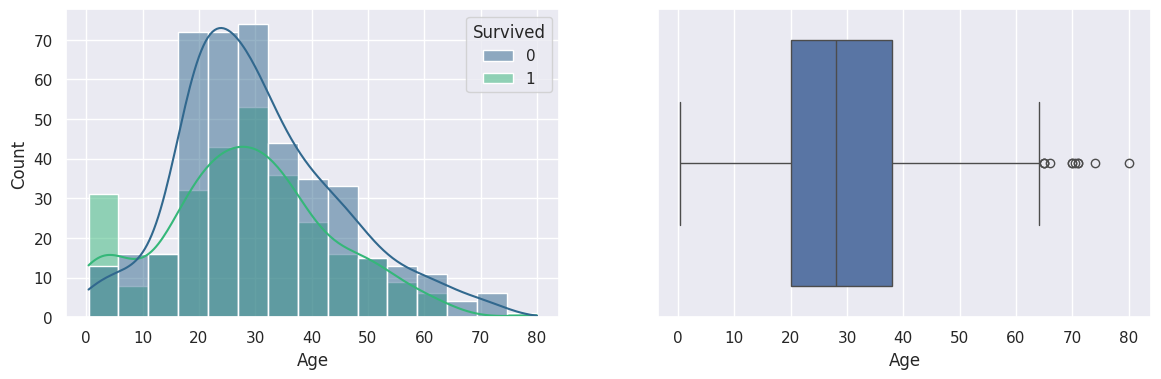

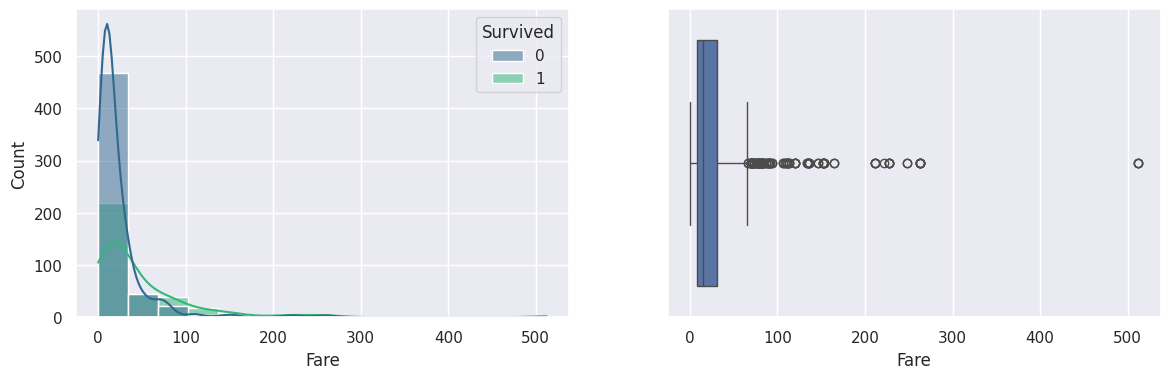

In [90]:
for feature in numerical_features:

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(data = df , x = feature , kde = True , hue = 'Survived' , palette='viridis' , bins = 15)
    plt.subplot(122)
    sns.boxplot(data = df , x = feature)

above both age and fare are right skewed , we need to take care of those and handle outliers , if we are gonna train a linear model

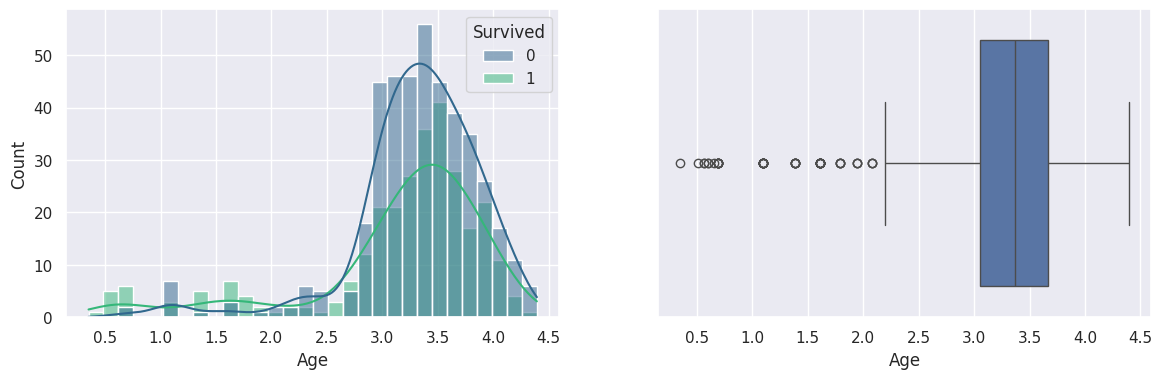

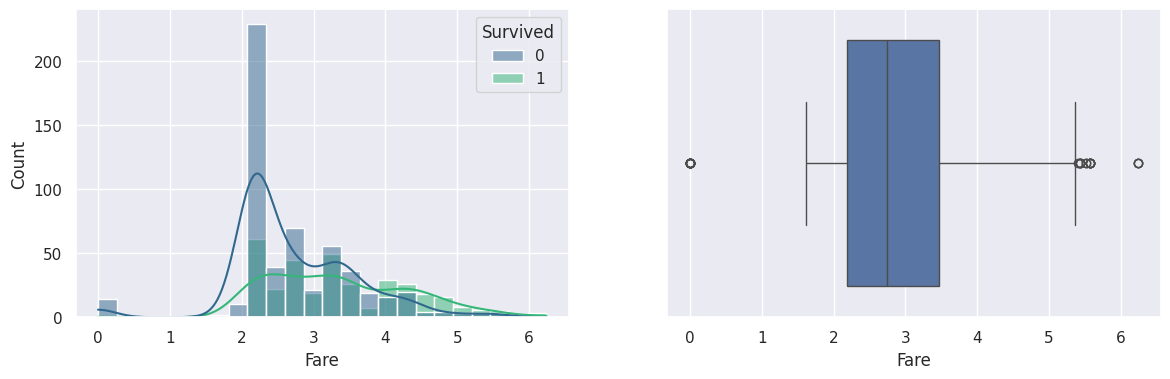

In [91]:
for feature in numerical_features:

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(data = np.log1p(df[numerical_features]) , x = feature , kde = True , hue = df['Survived'], palette='viridis')
    plt.subplot(122)
    sns.boxplot(data = np.log1p(df[numerical_features]) , x = feature )

we can see that age has worsen while fare has become a little better
### Conclusion<br>
1. Age : keep as it is<br>
2. Fare : log transform

#### Categorical Columns

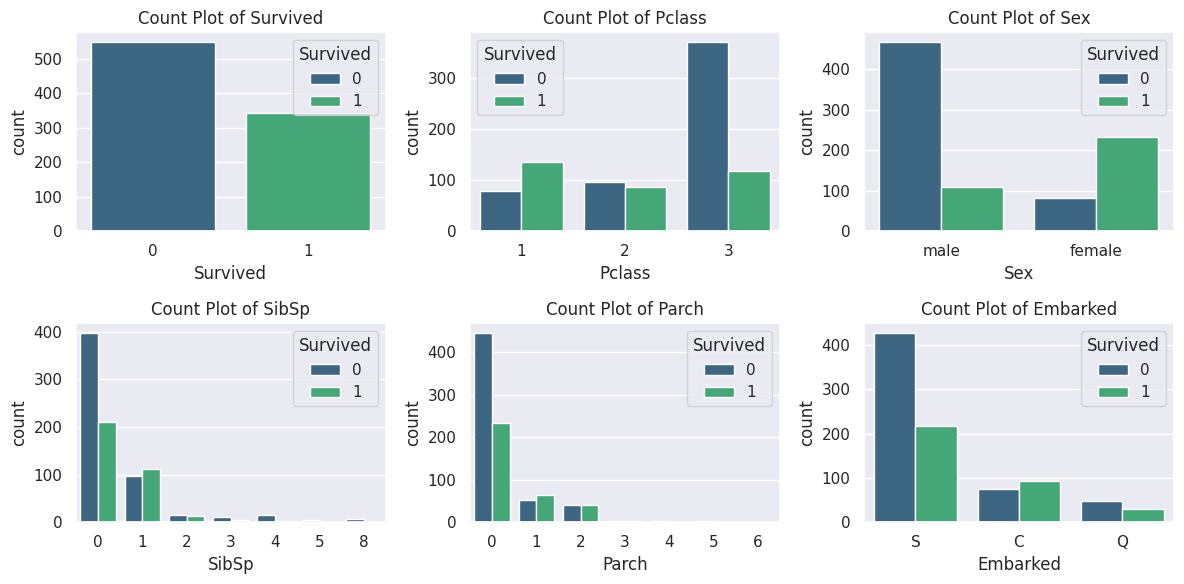

In [92]:
n_features = len(categorical_features)
n_cols = 3
n_rows = ((n_features + 2) // n_cols)  
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten() 

for i, feature in enumerate(categorical_features):
    ax = axes[i]
    sns.countplot(data=df, x=feature, ax=ax, palette='viridis' , hue = 'Survived')
    
    ax.set_title(f'Count Plot of {feature}', fontsize=12)

plt.tight_layout()
plt.show()

Note : we have to take care during the train test split phase , so that equal proportions of these all classes are splitted and there is no bias in sampling

#### Observations :
1. survival rate in pclass = 1 is highest
2. female about 50% survived more than men
3. less family size surived more i.e sibsp and parch
4. people who embarked on 'S' had more survival rate

### Bivariate Analysis

<Axes: xlabel='Age', ylabel='Fare'>

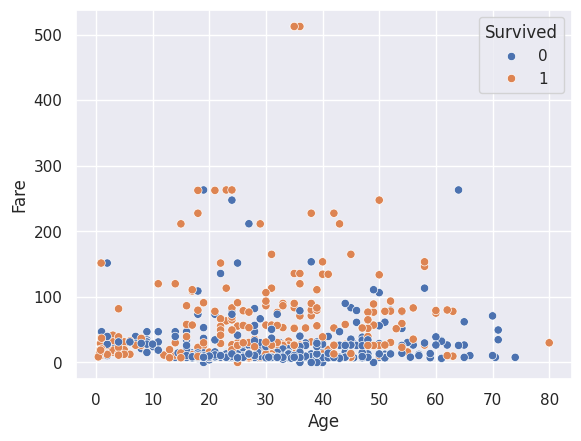

In [93]:
sns.scatterplot(data = df , x = 'Age' , y = 'Fare' , hue = 'Survived')

there is no much correlatoin between age and fare , but we can see that people who paid more for tickets have a bit higher survival rate

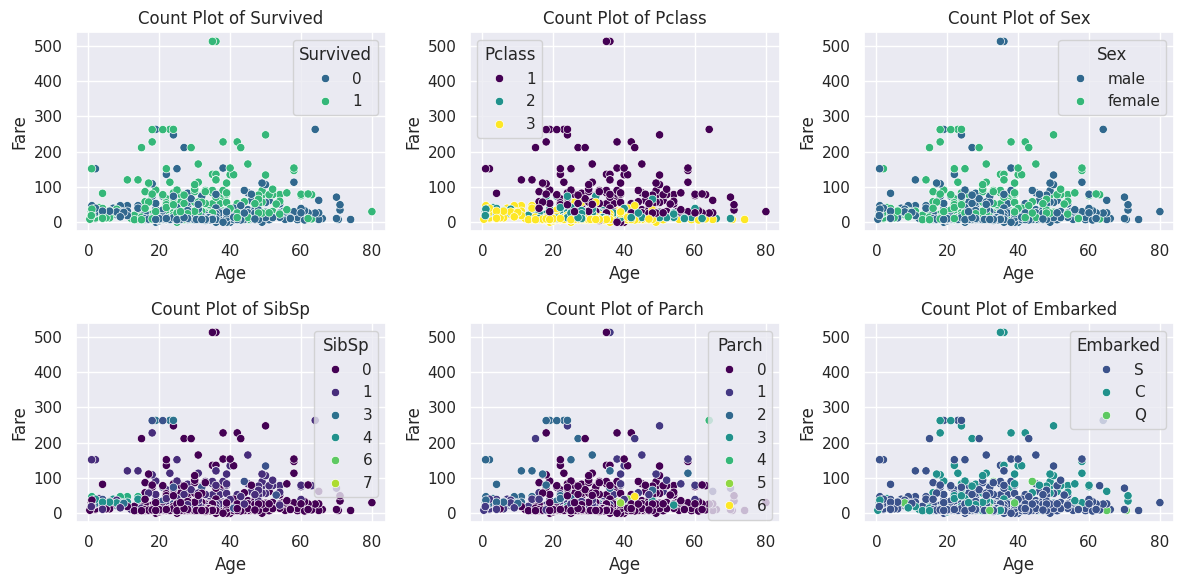

In [94]:
n_features = len(categorical_features)
n_cols = 3
n_rows = ((n_features + 2) // n_cols)  
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten() 

for i, feature in enumerate(categorical_features):
    ax = axes[i]
    sns.scatterplot(data=df, x='Age', y = 'Fare' ,  ax=ax, palette='viridis' , hue = feature)
    
    ax.set_title(f'Count Plot of {feature}', fontsize=12)

plt.tight_layout()
plt.show()

#### Observations
1. we can see that Pclass = 1 comparitively had higher fare prices , which again resulted in their better survival rate
2. rest of the features were comparatively uniformly distributed.

### multivariate analysis

In [95]:
df.corr(numeric_only= True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

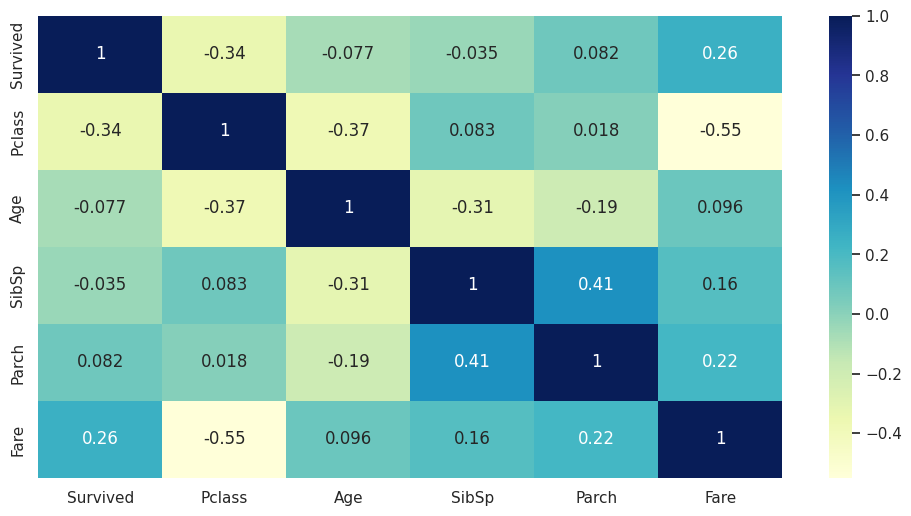

In [96]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True) , cmap='YlGnBu' , annot=True)

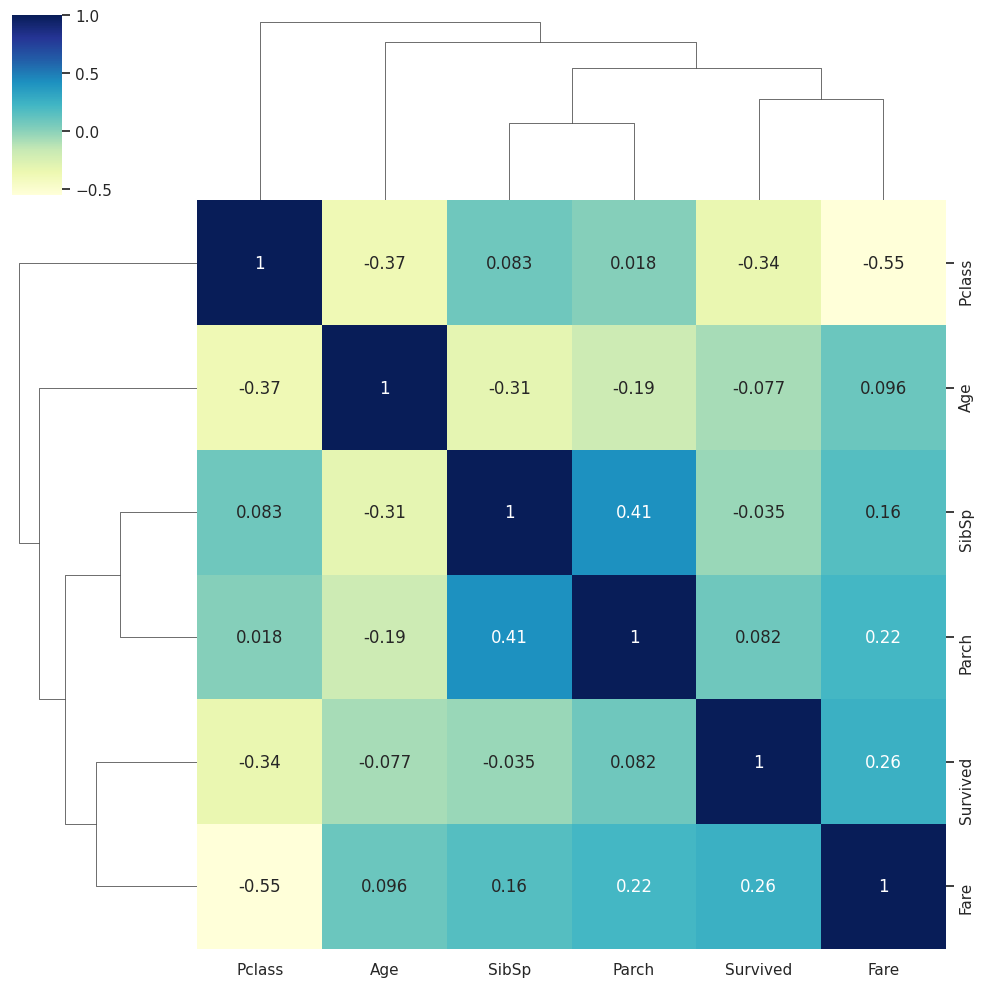

In [97]:
sns.clustermap(df.corr(numeric_only=True) , annot = True  , cmap = 'YlGnBu')

the above clustermap shows which of the features are realated